# Math/CS 165 Homework 2

Please fill the remainder of this notebook with your code (remove `pass` after "# your code here"), execute all cells, save the notebook on your machine, and upload the notebook only (i.e. not any other files in this folder) to Blackbboard.

## Problem 1
A census of the population of the United States is taken every 10 years. The following table lists the population, in thousands of people, from 1960 to 2010, and the data are also represented in the figure.

|Year|1960|1970|1980|1990|2000|2010|2020|
|:---|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|Population (in thousands)|179,323|203,302|226,542|249,633|281,422|308,746|331,449|

Use Lagrange interpolation to approximate the population in the years 1950, 1975, 2014, and 2025.

In [1]:
#from lagrange import lagrange

def lagrange(x_n, y_n, x_val): 
    # INPUT: list x_n of x-values, list y_n of y-values, x_val to be approximated
    # OUTPUT: P(x_val)
    n = len(x_n)
    Px = 0
    for i in range(n):
        p = 1
        for j in range(n):
            if i != j:
                p = p * (x_val - x_n[j])/(x_n[i] - x_n[j])    
        Px = Px + p * y_n[i]
    return Px


In [2]:
x_n = [1960,1970,1980,1990,2000,2010,2020]
y_n = [179323, 203302, 226542, 249633, 281422, 308746, 331449]
#x_val = 1950

#lagrange(x_n,y_n,x_val)
#print('P(%f) = ' % x_val,lagrange(x_n,y_n,x_val))

In [3]:
years = [1950, 1975, 2014, 2025]
for i in years:
    print('P(%f) = ' % i,lagrange(x_n,y_n,i))

P(1950.000000) =  257823.00000000006
P(1975.000000) =  215971.9921875
P(2014.000000) =  316059.5059072
P(2025.000000) =  367920.09375


The population in 1950 was approximately 150,697,360, and in 2014 the population was estimated to be 317,298,000. How accurate do you think your 1975 and 2025 figures are?

The population prediction for 1950 is 257,823,000, which is very far off from the nearest year 1960 (179,323,000), so I do not know why it did not follow a more linear pattern. 

1975 is very accurate, it is at 215,971,000 which is smack dab between the 1970 and 1980 populations. 

2025 is a reasonable guess of 367920, it is more than the 2020 prediction by about 30,000 which is about how much the population had grown in previous years. 

It appears that predictions for anything other than before the sequence work well. i.e. only predict in between or after values. 

Less accurate at the endpoints since we are using a polynomial to approximate an exponential function.

## Problem 2
Consider the following two simple algorithms.  The first sums the numbers from 0 to 99 and the seccond sums the numbers from 0 to 9999.

In [4]:
def alg1():
    return sum(range(100))
def alg2():
    return sum(range(10000))

We can use `%%timeit` at the beginning of a code block to conveniently time how long the algorithm runs. This will run the code block a number times (loops) and give the mean runtime and standard deviation. Note:  $ns$ stands for nanosecond ($10^{-9}$ of a second) and $\mu s$ stands for microsecond ($10^{-6}$ of a second).

In [5]:
%%timeit
alg1()

977 ns ± 31.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [6]:
%%timeit
alg2()

143 µs ± 7.26 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


I have written code to create $x$-values from 1 to 100 a random set of corresponding $y$-values.  Compare the times of using Lagrange interpolation versus Newton interpolation with divided differences for this example.

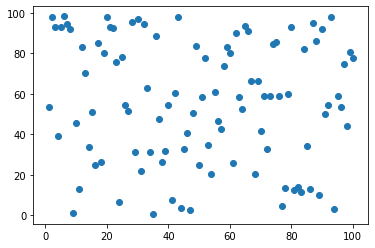

In [7]:
import numpy as np
import random
import matplotlib.pyplot as plt

n=100
x_data=np.arange(1,n+1)
y_data = []
for i in range(0,n):
    y_data.append(random.random()*100)
plt.scatter(x_data,y_data)
plt.show() 

In [8]:
%%timeit
#from lagrange import lagrange
for i in x_data:
    lagrange(x_data,y_data,i)
pass

713 ms ± 34.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
def newton_poly(coef, x, grid):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (grid -x[n-k])*p
    return p

In [14]:
%%timeit
#from divided_diff import divided_diff
#from newton_poly import newton_poly
# your code here
for i in x_data:
    newton_poly(x_data, y_data, i)
pass

35.9 ms ± 843 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Problem 3

Write a function `num_diff(f,a,b,n,option)`, with the output as `[df,X]`, where `f` is a function object. The function `num_diff` should compute the derivative of `f` numerical for `n` evenly spaced points starting at `a` and ending at `b` according to the method defined by `option`. The input argument `option` is one of the following strings: `‘forward’`, `‘backward’`, `‘central’`. Note that for the forward and backward method, the output argument, 'dy', should be a 1D array of length $(n−1)$, and for the central difference method dy should be a 1D array of length $(n−2)$. The function should also output a vector `X` that is the same size as `dy` and denotes the $x$-values for which `dy` is valid.

In [35]:
import numpy as np

def num_diff(f,a,b,n,option):
    # your code here
    if (option == 'forward'):
        h = (b-a)/(n-1)
        x = np.arange(a,b,h)
    #x = np.linspace(a,b,n)
    # compute vector of forward differences
        df = (f(x[1:])-f(x[:-1]))/h
    # compute corresponding grid
        X = x[:-1] 
        return [df,X]
    if (option == 'central'):
        h = (b-a)/(n-1)
        x= np.arange(a,b,h)
        df = (f(x[2:]) - f(x[:-2]))/2*h
        X = x[1:-1]
    
        return [df, X]
        
    if (option == 'backward'):
        h = (b-a)/(n-1)
        x = np.arange(a,b,h)
        df = (f(x[1:])-f(x[:-1]))/h
        X = x[1:] 
        return [df,X]

Use the following code to test your function:

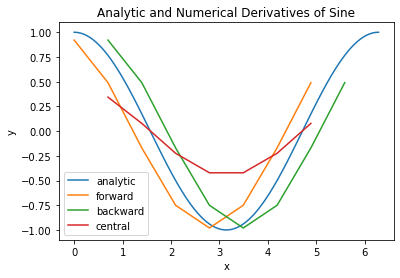

In [36]:
x = np.linspace(0, 2*np.pi, 100)
f = lambda x: np.sin(x)
[dyf, Xf] = num_diff(f, 0, 2*np.pi, 10, 'forward')
[dyb, Xb] = num_diff(f, 0, 2*np.pi, 10, 'backward')
[dyc, Xc] = num_diff(f, 0, 2*np.pi, 10, 'central')
plt.plot(x, np.cos(x), label = 'analytic')
plt.plot(Xf, dyf, label = 'forward')
plt.plot(Xb, dyb, label = 'backward')
plt.plot(Xc, dyc, label = 'central')
plt.legend()
plt.title('Analytic and Numerical Derivatives of Sine')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Problem 4

Write a function `num_int(f,a,b,n,option)`, where the output `I` is the numerical integral of `f`, a function object, computed on a grid of `n` evenly spaced points starting at `a` and ending at `b`. The integration method used should be one of the following strings defined by option: `‘rect’`, `‘trap’`, `‘simp’`. For the rectangle method, the function value should be taken from the right endpoint of the interval. You may assume that n is odd.

In [60]:
def num_int(f,a,b,n,option):
    # your code here
    if (option == "rect"):
        x = np.linspace(a,b,n)
        h = (b-a)/(n-1)
        I = h * sum(f(x[1:]))
        return I
    if (option == "trap"):
        x = np.linspace(a,b,n)
        h = (b-a)/(n-1)
        I = (h/2)*(f(x[0]) + 2 * sum(f(x[1:n-1])) + f(x[n-1]))
        return I
    if (option == "simp"):
        x = np.linspace(a,b,n)
        h = (b-a)/(n-1)
        I = (h/3)*(f(x[0])+ 4*sum(f(x[1:-1:2])) + 2*sum(f(x[2:-2:2]))+ f(x[n-1]))
        return I


Use the following code to test your function:

In [61]:
f = lambda x: x**2
print(num_int(f, 0, 1, 3, 'rect'))
print(num_int(f, 0, 1, 3, 'trap'))
print(num_int(f, 0, 1, 3, 'simp'))

0.625
0.375
0.3333333333333333


In [62]:
f = lambda x: np.exp(x**2)
print(num_int(f, -1, 1, 101, 'simp'))
print(num_int(f, -1, 1, 10001, 'simp'))
print(num_int(f, -1, 1, 100001, 'simp'))

2.92530358839265
2.9253034918143648
2.925303491814353
